In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

%matplotlib inline
plt.style.use('ggplot')

In [5]:
data = np.loadtxt('kka2')

In [31]:
h = 50
xmin = data.min()
xmax = data.max()
jmax = int(10*(xmax-xmin)/h)
dx = (xmax-xmin)/jmax

x = []
y = []

for j in range(jmax):
    xp = j*dx+xmin
    
    p = 0.0
    
    for i in range(len(data)):
        p = p + np.exp(-(( (data[i]-xp)/h)**2)/2)/(h*np.sqrt(2*np.pi))
    #print(xp - x0,p/Ly)
    x.append(xp)
    y.append(p/50)

In [16]:
np.savetxt('teste.txt', np.c_[x,y], delimiter='\t', fmt='%1.6e')

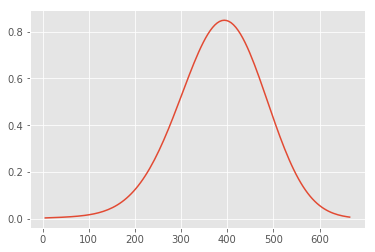

In [32]:
plt.plot(x,y)

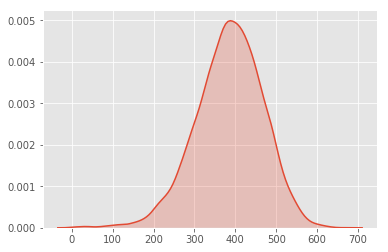

In [34]:
sns.kdeplot(data, shade=True)

In [13]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

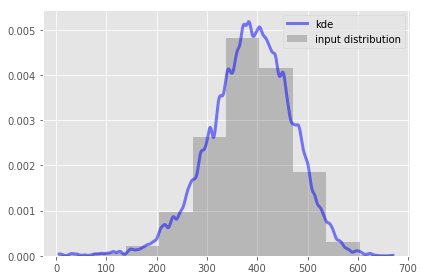

In [14]:
# The grid we'll use for plotting
x_grid = np.linspace(data.min(), data.max(), 10000)
x = data

fig, ax = plt.subplots()
ax.hist(data, fc='black', alpha=0.2, label='input distribution', density=True)

pdf = kde_sklearn(x, x_grid, bandwidth=4)
ax.plot(x_grid, pdf, color='blue', alpha=0.5, lw=3, label='kde')
ax.legend()
plt.tight_layout()